In [35]:
img_rows = 28
img_cols = 28
num_classes = 10
val_size = 0.2
random_state = 99
batch_size = 128
epochs = 20

input_shape = (img_rows, img_cols, 1)

In [36]:
import tensorflow_datasets
print(dir(tensorflow_datasets.image_classification))

['Beans', 'BeeDataset', 'Bigearthnet', 'BinaryAlphaDigits', 'Caltech101', 'CaltechBirds2010', 'Cars196', 'Cassava', 'CatsVsDogs', 'Chexpert', 'Cifar10', 'Cifar100', 'Cifar10Corrupted', 'Cifar10_1', 'CitrusLeaves', 'Cmaterdb', 'ColorectalHistology', 'ColorectalHistologyLarge', 'CuratedBreastImagingDDSM', 'CycleGAN', 'DeepWeeds', 'DiabeticRetinopathyDetection', 'Dmlab', 'Domainnet', 'Dtd', 'EMNIST', 'Eurosat', 'FashionMNIST', 'Food101', 'GeirhosConflictStimuli', 'HorsesOrHumans', 'INaturalist2017', 'INaturalist2018', 'Imagenet2012', 'Imagenet2012Corrupted', 'Imagenet2012Fewshot', 'Imagenet2012Multilabel', 'Imagenet2012Real', 'Imagenet2012Subset', 'ImagenetA', 'ImagenetLt', 'ImagenetR', 'ImagenetResized', 'ImagenetSketch', 'ImagenetV2', 'Imagenette', 'Imagewang', 'KMNIST', 'LFW', 'MNIST', 'MNISTCorrupted', 'Malaria', 'Omniglot', 'OxfordFlowers102', 'OxfordIIITPet', 'PatchCamelyon', 'PetFinder', 'Places365Small', 'PlantLeaves', 'PlantVillage', 'PlantaeK', 'QuickdrawBitmap', 'Resisc45', 'Ro

In [37]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [39]:
(train_data, y), (test_data, y_test) = tfds.as_numpy(tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True
))

In [40]:
print('train - rows:', train_data.shape[0], 'columns:', train_data.shape[1], 'rows:', train_data.shape[2])
print('test - rows:', test_data.shape[0], 'columns:', test_data.shape[1], 'rows:', test_data.shape[2])

train_data.shape, y.shape, test_data.shape, y_test.shape

train - rows: 60000 columns: 28 rows: 28
test - rows: 10000 columns: 28 rows: 28


((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

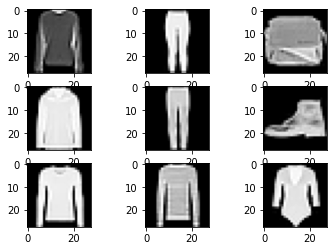

In [41]:
#แสดงภาพตตัวอย่าง 9 ภาพ
import matplotlib.pyplot as plt


for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))

plt.savefig('picture.jpeg', dpi=300)

In [42]:
#ขยายมิติ Dataset 
#print(train_data.shape, test_data.shape)

train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

print(train_data.shape, test_data.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [43]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [44]:
from keras.utils.np_utils import to_categorical

y = to_categorical(y)
y_test = to_categorical(y_test)

print(y.shape, y_test.shape)
y[:10]

(60000, 10) (10000, 10)


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, y, 
                                                    test_size=0.2,
                                                    random_state=99)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True)

In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [1]:
# pip install graphviz
# conda install -c conda-forge pydotplus

from tensorflow.keras.utils import plot_model

plot_model(model, 'digit.png', show_shapes=True, show_layer_names=True)

NameError: name 'model' is not defined

In [48]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

In [50]:
# history = model.fit(X_train, y_train, epochs=15, 
#                     batch_size=128, verbose=1, 
#                     validation_data=(X_test, y_test), shuffle=True)

In [51]:
# train the head of the network
history = model.fit(
				datagen.flow(X_train, y_train, batch_size=batch_size),
				steps_per_epoch=len(X_train) // batch_size,
				validation_data=(X_test, y_test),
				validation_steps=len(X_test) // batch_size,
				epochs=epochs)

Epoch 1/20
375/375 [==============================] - 27s 72ms/step - loss: 1.2931 - accuracy: 0.5239 - val_loss: 0.7085 - val_accuracy: 0.7155
Epoch 2/20
375/375 [==============================] - 29s 78ms/step - loss: 0.9419 - accuracy: 0.6524 - val_loss: 0.6516 - val_accuracy: 0.7353
Epoch 3/20
375/375 [==============================] - 29s 77ms/step - loss: 0.8534 - accuracy: 0.6840 - val_loss: 0.6136 - val_accuracy: 0.7561
Epoch 4/20
375/375 [==============================] - 29s 77ms/step - loss: 0.8126 - accuracy: 0.7009 - val_loss: 0.5981 - val_accuracy: 0.7740
Epoch 5/20
375/375 [==============================] - 29s 78ms/step - loss: 0.7798 - accuracy: 0.7120 - val_loss: 0.5650 - val_accuracy: 0.7791
Epoch 6/20
375/375 [==============================] - 29s 77ms/step - loss: 0.7584 - accuracy: 0.7221 - val_loss: 0.5604 - val_accuracy: 0.7723
Epoch 7/20
375/375 [==============================] - 31s 82ms/step - loss: 0.7340 - accuracy: 0.7303 - val_loss: 0.5080 - val_accuracy:

In [52]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

375/375 [==============================] - 2s 5ms/step - loss: 0.4148 - accuracy: 0.8473
Accuracy: 0.847


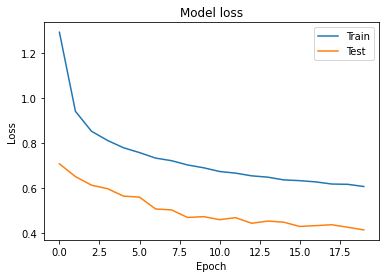

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

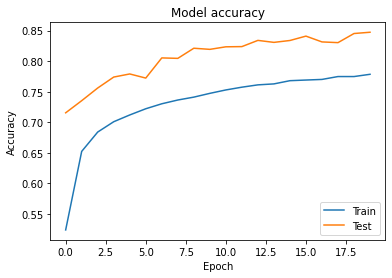

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [55]:
import numpy as np 
import pandas as pd 

y_pred = model.predict(X_test)
y_pred1 = np.argmax(y_pred, axis=1)

y_test = np.argmax(y_test, axis=1)

In [56]:
df = pd.DataFrame({'ข้อมูลจริง': y_test, 'ข้อมูลพยากรณ์': y_pred1})
df

,ข้อมูลจริง,ข้อมูลพยากรณ์
0,6,6
1,7,7
2,1,1
3,1,1
4,0,0
...,...,...
11995,2,2
11996,5,5
11997,5,5
11998,5,5


In [57]:
import collections as cs 
c = cs.Counter(y_test)
c 

Counter({6: 1236,
         7: 1205,
         1: 1227,
         0: 1128,
         5: 1221,
         3: 1222,
         4: 1196,
         2: 1216,
         8: 1157,
         9: 1192})

In [58]:
 class_names = ["T-shirt/top", "Trouser", "Pullover", 
               "Dress", "Coat","Sandal", "Shirt", "Sneaker",
               "Bag", "Ankle boot"]
 class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Accuracy Score: 0.85
              precision    recall  f1-score   support

 T-shirt/top     0.7399    0.8750    0.8018      1128
     Trouser     0.9916    0.9674    0.9794      1227
    Pullover     0.7356    0.8396    0.7842      1216
       Dress     0.8618    0.8723    0.8670      1222
        Coat     0.7509    0.7082    0.7289      1196
      Sandal     0.9038    0.9615    0.9317      1221
       Shirt     0.6523    0.4644    0.5425      1236
     Sneaker     0.9353    0.8755    0.9044      1205
         Bag     0.9357    0.9689    0.9520      1157
  Ankle boot     0.9381    0.9530    0.9455      1192

    accuracy                         0.8473     12000
   macro avg     0.8445    0.8486    0.8437     12000
weighted avg     0.8445    0.8473    0.8431     12000

[[ 987    0   23   43    5    0   50    0   19    1]
 [   1 1187    0   23    2    1   12    0    1    0]
 [  11    1 1021    9   89    4   71    0   10    0]
 [  72    7    4 1066   27    0   40    0    4    2]
 [   2  

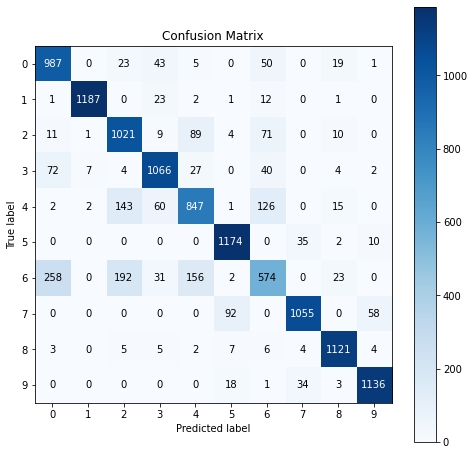

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred1)))
print(classification_report(y_test, y_pred1, target_names=class_names, digits=4))
cm = confusion_matrix(y_test, y_pred1)
print(cm)

#pip install scikit-plot
import scikitplot as skplot 
plt.rcParams['figure.figsize'] = 8,8
skplot.metrics.plot_confusion_matrix(y_test, y_pred1)
plt.show()

##### การบันทึก model เอาไว้ใช้งาน 

In [ ]:
model.save('tfdsmodel.h5')
model.save('tfdsmodel')

##### การโหลด model มาใช้งาน

In [ ]:
#my_model.get_config()
from tensorflow.keras.models import load_model
datamodel = load_model('tfdsmodel.h5')

datamodel.summary()

In [ ]:
history = datamodel.fit(X_train, y_train, 
                    epochs=50, batch_size=10, 
                    verbose=1, validation_split=0.25,
                    shuffle=True) #validation_data=(X_test,y_test)